In [13]:
import yfinance as yf  
df = yf.download('BTC-USD')
df = df.head(400)

[*********************100%%**********************]  1 of 1 completed


In [14]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2015-10-17,262.747009,273.578003,262.367004,270.640015,270.640015,43199600
2015-10-18,270.907013,271.667999,260.777008,261.643005,261.643005,22434300
2015-10-19,261.860992,264.820007,260.950989,263.437012,263.437012,25258800


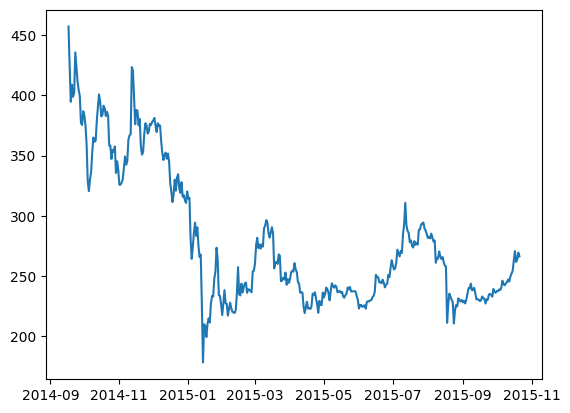

In [15]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.plot(df.index, df['Adj Close'])

In [16]:
to_row = int(len(df)*0.9)
training_data = list(df[0:to_row]['Adj Close'])
testing_data = list(df[to_row:]['Adj Close'])

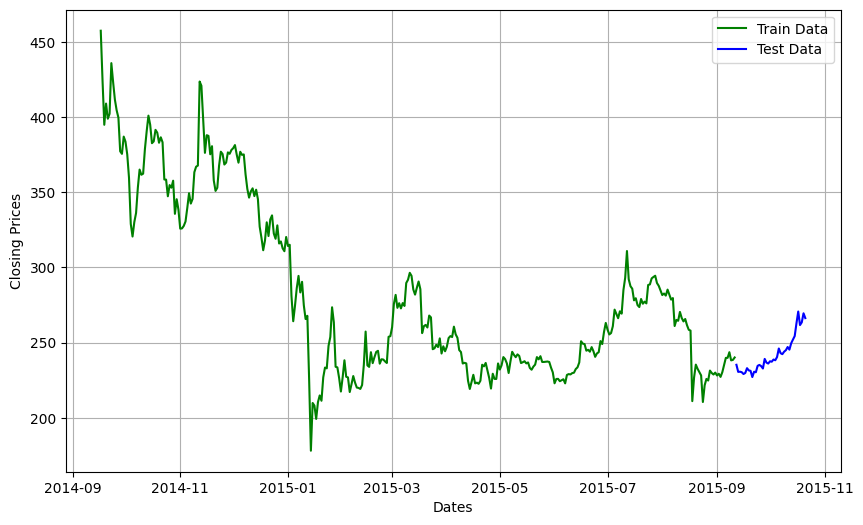

In [17]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train Data')
plt.plot(df[to_row:]['Adj Close'], 'blue',label='Test Data')
plt.legend()


In [18]:
model_predictions = []
n_test_obser = len(testing_data)



In [24]:

for i in range(n_test_obser):
    model = ARIMA(training_data, order=(4,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()  # This will return a single float value since it's a one-step forecast
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)  # Assuming this is correct and you intend to expand the training dataset with each test observation



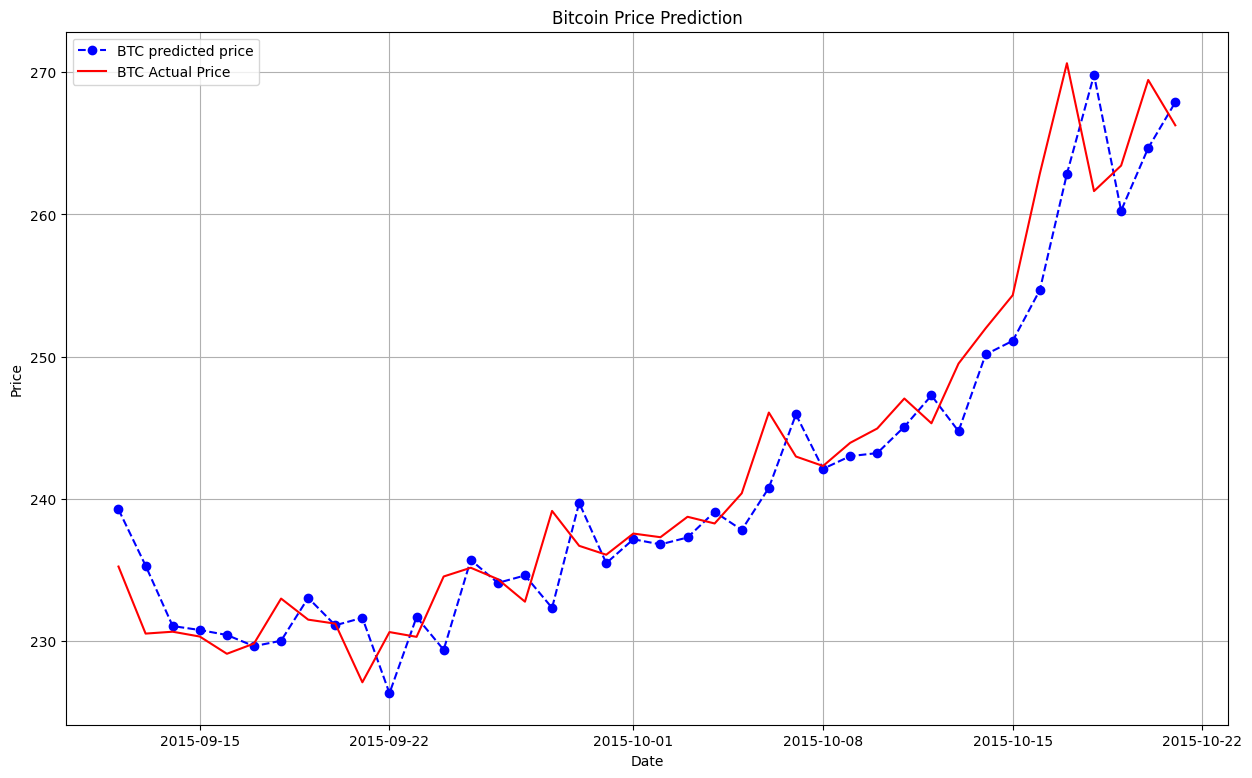

In [33]:
plt.figure(figsize = (15,9))
plt.grid(True)

data_range = df[to_row:].index
plt.plot(data_range, model_predictions[0:40], color = 'blue' , marker = 'o', linestyle = 'dashed', label = 'BTC predicted price')
plt.plot(data_range, testing_data, color = 'red' , label = 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()